## 📑 Table of Contents
1. [Introduction](#)
2. [Fundamental Metrics](#)
    - ROE
    - P/E Ratio
    - Debt-to-Equity
3. [1-Year Stock Price Comparison](#)
4. [Volatility Analysis](#)
5. [Technical Analysis: Moving Averages](#)
    - AAPL
    - NVDA
    - HIMS
    - HOOD
    - TSLA
6. [Conclusion](#)

# 📊 Equity Analysis Dashboard

*Author*: Ibrahima Ball   
**Date**: July 2025  

This dashboard provides a comparative analysis of 5 publicly traded companies with different profiles that I like (Apple, NVIDIA, Hims & Hers, Robinhood, Tesla) using **fundamental metrics**, **historical price trends**, and **technical indicators**.  
The goal is to derive actionable insights for investors with different risk profiles.



In [4]:
# Install necessary libraries (if not already installed)
!pip install yfinance plotly

# Import core libraries for data retrieval, analysis, and visualization
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Apply a clean, professional plotting style
plt.style.use('ggplot')

In [5]:
# List of stock ticker symbols to analyze
tickers = ['AAPL', 'NVDA', 'HIMS', 'HOOD', 'TSLA']

In [6]:
# Retrieve fundamental data for each stock
fundamentals = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    # Store selected key metrics in a dictionary
    fundamentals[ticker] = {
        'Company': info.get('longName'),
        'Sector': info.get('sector'),
        'P/E Ratio': info.get('trailingPE'),
        'EPS': info.get('trailingEps'),
        'P/B Ratio': info.get('priceToBook'),
        'ROE': info.get('returnOnEquity'),
        'Debt/Equity': info.get('debtToEquity'),
        'Dividend Yield': info.get('dividendYield')
    }

# Convert dictionary to a DataFrame for easy analysis
fundamentals_df = pd.DataFrame(fundamentals).T.reset_index(drop=True)
fundamentals_df

,Company,Sector,P/E Ratio,EPS,P/B Ratio,ROE,Debt/Equity,Dividend Yield
0,Apple Inc.,Technology,32.797825,6.43,47.168415,1.38015,146.994,0.51
1,NVIDIA Corporation,Technology,55.574196,3.1,50.11053,1.15463,12.267,0.03
2,"Hims & Hers Health, Inc.",Consumer Defensive,72.67647,0.68,20.113958,0.36788,11.54,None
3,"Robinhood Markets, Inc.",Financial Services,62.634285,1.75,12.19108,0.21431,118.056,None
4,"Tesla, Inc.",Consumer Cyclical,186.47728,1.76,14.156315,0.08774,17.407,None


*   Apple & NVIDIA show exceptionally high ROE — very efficient in capital use.
*   Apple has strongest EPS, NVIDIA strong second.


*   
Tesla’s P/E is extremely high relative to peers — priced for perfection.
*  
Apple & Robinhood have high leverage (D/E), which adds risk.

*   
Only Apple provides meaningful dividends.










In [7]:
# Plot ROE by company as an interactive bar chart
fig = px.bar(
    fundamentals_df,
    x='Company',
    y='ROE',
    title='Return on Equity (ROE) by Company',
    text='ROE',
    labels={'ROE': 'Return on Equity'}
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


**Insight:** Apple and NVIDIA demonstrate exceptionally high ROE, at approximately 138% and 115%, respectively. This reflects their strong ability to generate profit from shareholder equity, likely boosted by efficient operations and high margins. Hims and Robinhood, while much smaller, still deliver decent ROE given their scale. Tesla’s ROE lags behind at around 8.77%, suggesting its profitability relative to equity is modest compared to peers.

In [9]:
# Plot P/E Ratio by Company as an interactive bar chart.
# The chart visualizes each company's Price-to-Earnings (P/E) ratio,
# which reflects how much investors are willing to pay per dollar of earnings.
# We display the ratio on top of each bar and adjust text formatting for readability.

fig = px.bar(
    fundamentals_df,
    x='Company',
    y='P/E Ratio',
    title='P/E Ratio by Company',
    text='P/E Ratio'  # display actual values on the bars
)

# Format the text on bars to 2 decimal places and position it above the bar
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Ensure text remains readable even if crowded
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


**Insight:**
Tesla has the highest P/E ratio at 183.57, indicating extremely high market expectations and making it the most expensive relative to current earnings. Hims and Robinhood also have elevated P/E ratios, reflecting speculative investor sentiment. Apple, with the lowest P/E at 32.66, appears more reasonably valued relative to its earnings, suggesting it may be a safer choice for risk-averse investors.

In [10]:
# Plot Debt-to-Equity Ratio by Company as an interactive bar chart.
# This chart visualizes each company's Debt-to-Equity (D/E) ratio,
# which measures a company’s financial leverage. A higher ratio implies
# greater reliance on debt financing relative to equity.
# The actual D/E ratio is displayed on top of each bar for clarity.

fig = px.bar(
    fundamentals_df,
    x='Company',
    y='Debt/Equity',
    title='Debt-to-Equity Ratio by Company',
    text='Debt/Equity'  # display actual values on the bars
)

# Format text on bars to 2 decimal places and position it above the bar
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.show()


**Insight:**
Apple and Robinhood carry high debt-to-equity ratios, at approximately 147% and 118%, respectively, suggesting they rely heavily on debt financing. While this can amplify returns, it also adds risk during downturns. NVIDIA, Tesla, and Hims have much lower leverage, indicating more conservative capital structures.

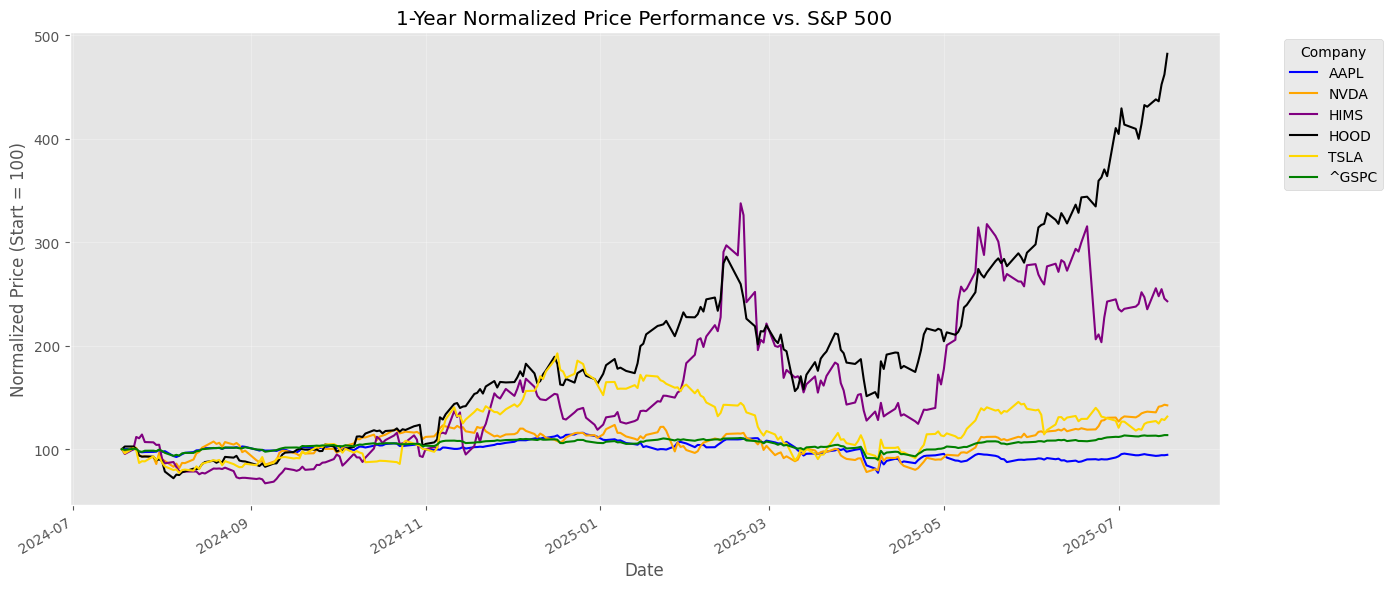

In [12]:
# 📊 Plot normalized price performance of all tickers + S&P 500

# Define benchmark and combined tickers
benchmark = '^GSPC'
all_tickers = tickers + [benchmark]

# Fetch 1-year closing prices
hist_prices = pd.DataFrame()

for ticker in all_tickers:
    df = yf.Ticker(ticker).history(period="1y")['Close']
    hist_prices[ticker] = df

# Normalize prices to start at 100
hist_norm = hist_prices / hist_prices.iloc[0] * 100

# Define consistent colors
colors = {
    'AAPL': 'blue',
    'NVDA': 'orange',
    'HIMS': 'purple',
    'HOOD': 'black',
    'TSLA': 'gold',
    '^GSPC': 'green'
}

# Plot normalized prices
ax = hist_norm.plot(
    figsize=(14,6),
    color=[colors[col] for col in hist_norm.columns],
    title="1-Year Normalized Price Performance vs. S&P 500"
)

plt.ylabel('Normalized Price (Start = 100)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insight:**
Over the past year, **Robinhood (HOOD)** and **Hims (HIMS)** delivered the strongest gains, significantly outperforming the **S&P 500** benchmark. This reflects their speculative and high-volatility profiles, attractive to risk-seeking investors. **Tesla (TSLA)** and **NVIDIA (NVDA)** also outperformed the benchmark, while **Apple (AAPL)**closely tracked the market, showcasing its stable, mature position. The **S&P 500** serves as a baseline for evaluating relative stock performance.

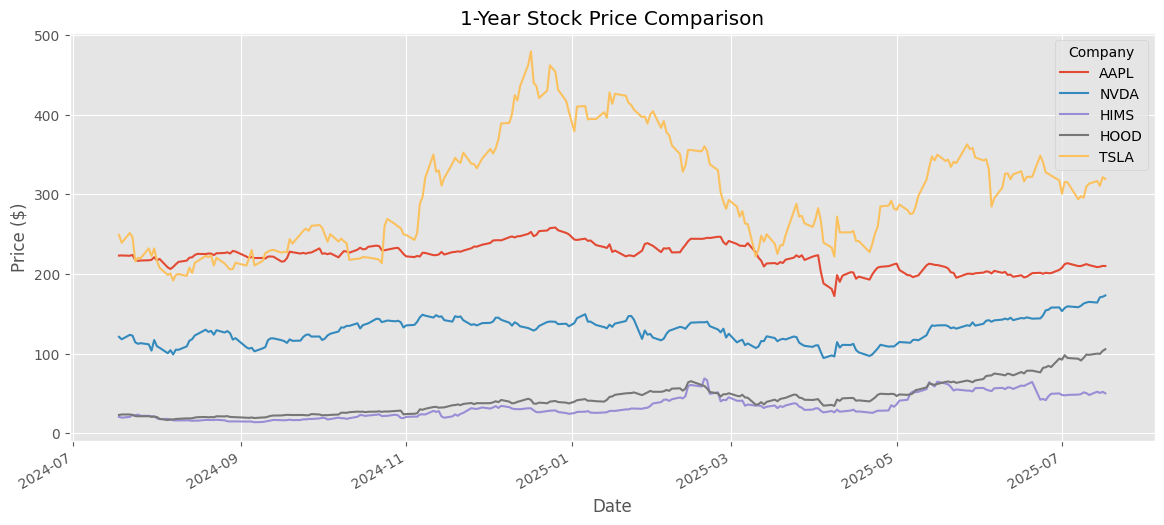

In [33]:
# Retrieve and plot 1-year daily closing prices for all selected companies.
# This allows for a visual comparison of how each stock's price evolved over the past year.
# We fetch the historical 'Close' price for each ticker and combine them into a single DataFrame for plotting.

hist_prices = pd.DataFrame()

for ticker in tickers:
    # Fetch 1 year of daily price history for each stock
    df = yf.Ticker(ticker).history(period="1y")['Close']
    hist_prices[ticker] = df

# Plot all stock prices on the same chart for easy comparison
hist_prices.plot(figsize=(14,6), title="1-Year Stock Price Comparison")

plt.ylabel('Price ($)')       # Y-axis label: price in dollars
plt.xlabel('Date')            # X-axis label: date
plt.legend(title='Company')   # Legend showing company names
plt.show()


**Insight:**
Over the past year, **Tesla (TSLA)** showed the largest price swings and the highest peak, reflecting its volatile growth narrative and strong investor sentiment despite corrections. **Apple (AAPL)** and **NVIDIA (NVDA)** displayed steadier upward trends, with **NVIDIA** showing more pronounced growth than Apple. **Hims (HIMS)** and **Robinhood (HOOD)** traded at much lower price levels, with modest gains, reflecting their smaller market capitalization and riskier profiles. Overall, **TSLA** and **NVDA** appear to attract momentum-driven moves, while **AAPL** remains a more stable performer.

In [34]:
# Calculate and plot the volatility of each stock based on daily returns.
# Volatility is measured as the standard deviation of daily percentage returns over the past year.
# Higher volatility indicates larger price fluctuations and greater investment risk.

# Compute daily returns and their standard deviation for each company
volatility = daily_returns.std()

# Plot volatility as a bar chart
fig = px.bar(
    volatility,
    x=volatility.index,               # Company names on x-axis
    y=volatility.values,             # Volatility values on y-axis
    labels={'x': 'Company', 'y': 'Volatility'},
    title='Volatility (Standard Deviation of Daily Returns)'
)

fig.show()


**Insight:**
Among the five companies, **Hims (HIMS)** exhibits the highest volatility, indicating the most unpredictable and risky daily price movements, typical of small-cap or growth-stage firms. **Apple (AAPL)** shows the lowest volatility, reflecting its status as a mature, stable company with consistent performance. **NVIDIA (NVDA)**, **Robinhood (HOOD)**, and **Tesla (TSLA)** fall in between, with moderate volatility levels that balance growth potential with risk. Investors with a low risk tolerance may prefer **Apple**, while risk-seeking investors might be drawn to **Hims**’ high-risk, high-reward profile.

In [38]:
# Define a reusable function to plot moving averages for any stock ticker.
# This function retrieves 1-year historical daily prices for the given ticker,
# calculates two simple moving averages (default 20-day and 50-day),
# and plots them along with the daily closing price.
# Moving averages help highlight short-term and medium-term trends.

def plot_moving_averages(ticker, window1=20, window2=50):
    """
    Plot 1-year closing price of a stock along with two moving averages.

    Parameters:
    ticker (str): Stock ticker symbol (e.g., 'AAPL', 'TSLA')
    window1 (int): Window for the first moving average (default: 20)
    window2 (int): Window for the second moving average (default: 50)

    The function creates a line chart showing:
    - Daily closing price
    - Short-term moving average (MA{window1})
    - Medium-term moving average (MA{window2})

    These indicators help identify bullish/bearish trends based on crossovers and price positions.
    """
    df = yf.Ticker(ticker).history(period='1y')
    df[f'MA{window1}'] = df['Close'].rolling(window=window1).mean()
    df[f'MA{window2}'] = df['Close'].rolling(window=window2).mean()
    df[['Close', f'MA{window1}', f'MA{window2}']].plot(
        figsize=(12,6),
        title=f'{ticker} 1-Year Price with MA{window1} & MA{window2}'
    )
    plt.ylabel('Price ($)')
    plt.show()


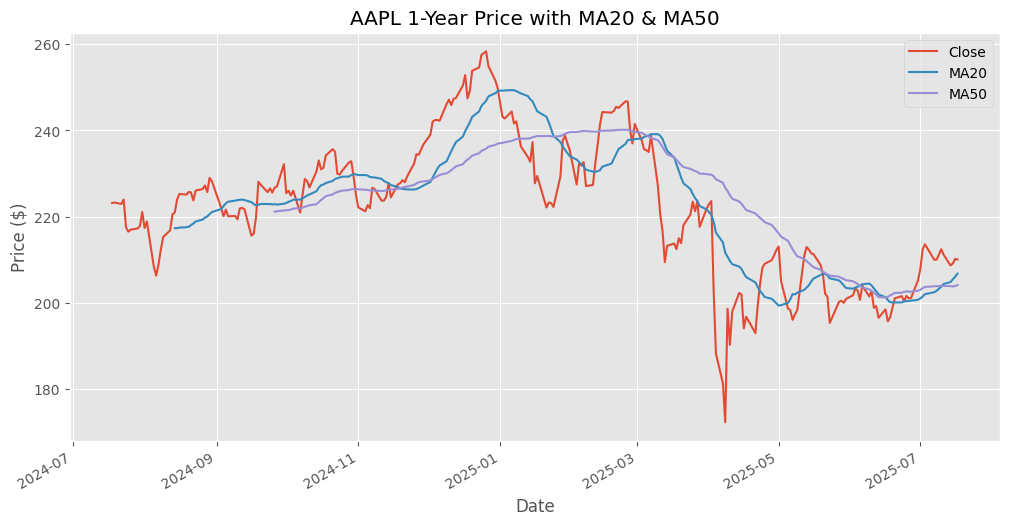

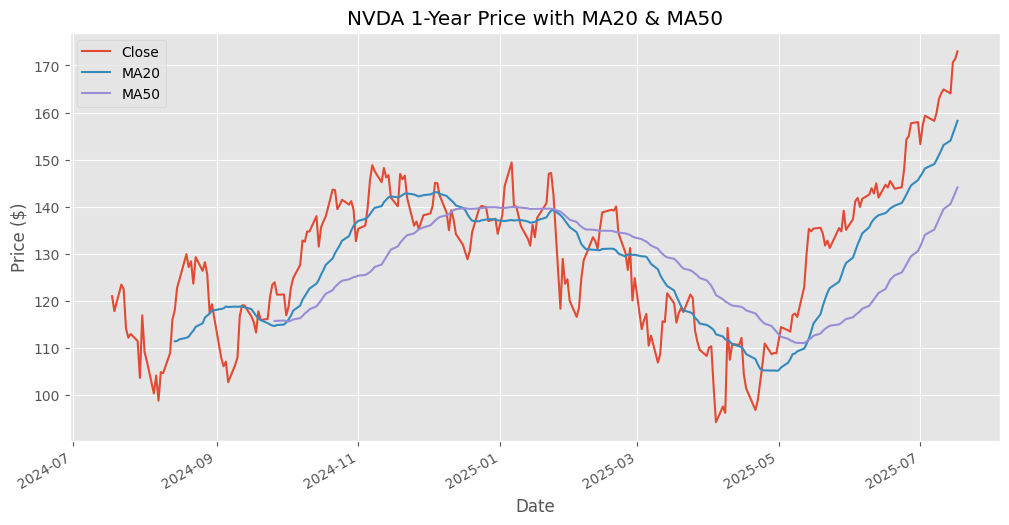

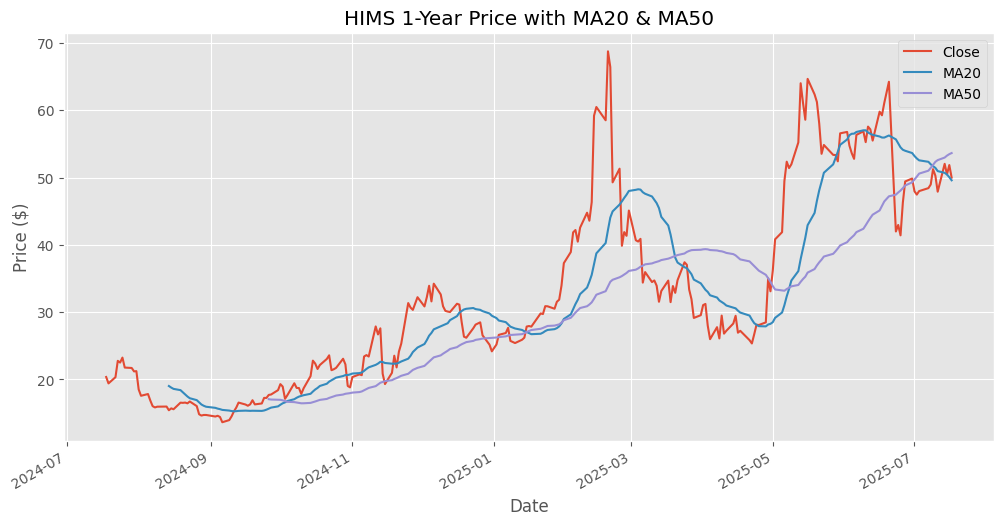

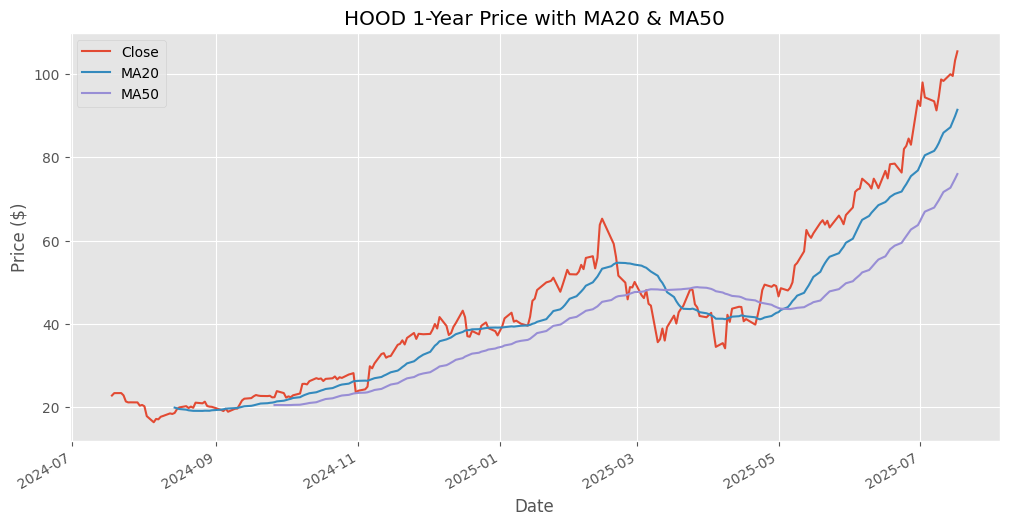

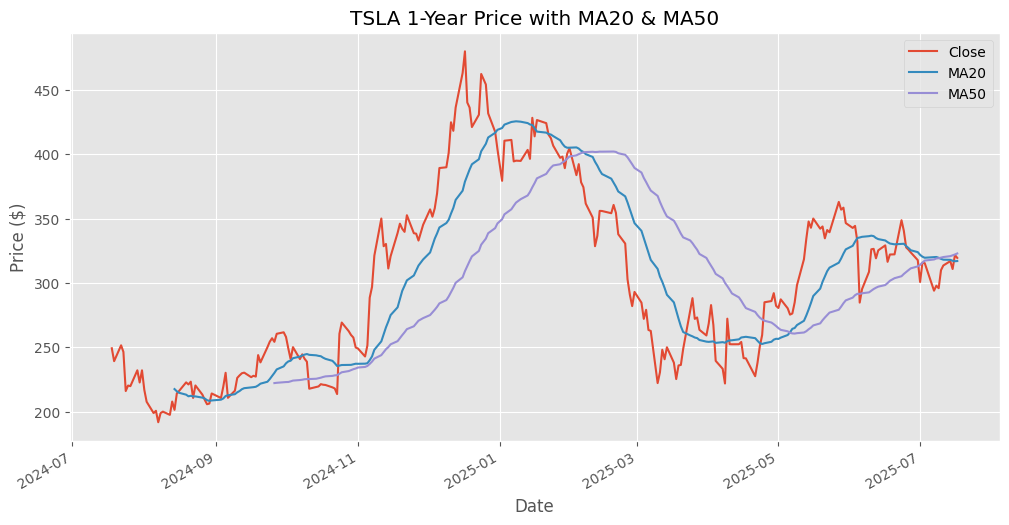

In [37]:
for t in tickers:
    plot_moving_averages(t)


**APPLE** **Insight:**
Over the past year, Apple’s stock price showed several key technical signals. In late 2024, the price traded consistently above both the 20-day (MA20) and 50-day (MA50) moving averages, indicating a strong bullish trend. However, starting early 2025, the price fell below both averages, with MA20 crossing below MA50 — a classic **bearish crossover signal**, suggesting downward momentum. More recently, the price appears to be recovering and approaching the moving averages again, which could signal a potential reversal if it breaks above. Investors may monitor the moving averages for confirmation of a new trend direction.

**NVIDIA** **Insight:**
NVIDIA’s price action over the year shows a strong recovery after a mid-period downtrend. During late 2024, the stock maintained a bullish posture above both moving averages, but in early 2025 the price dropped below the MA50 and MA20, indicating a bearish phase. Notably, the price bottomed out in mid-2025 and staged a sharp rally, crossing above both MA20 and MA50 in what is known as a **bullish crossover**, signaling a renewed uptrend. The current trajectory shows continued momentum, with the price well above both moving averages — a positive signal for trend-following investors.

**HIMS** **Insight:**
Hims’ stock price exhibited highly volatile behavior over the year, with multiple sharp spikes and corrections. Around early 2025, the price experienced a significant breakout above both the MA20 and MA50, signaling strong bullish momentum. However, this rally was not sustained, and the price dropped below the moving averages mid-year, suggesting a loss of upward momentum. Recently, the price is oscillating around the MA20 and MA50, indicating a period of consolidation and indecision in market sentiment. Investors may watch for a decisive break above or below the moving averages to gauge the next trend direction.

**ROBINHOOD** **Insight:**
Robinhood’s stock price demonstrated a strong and sustained uptrend over the past year. The price steadily climbed above both moving averages starting around late 2024, with the MA20 consistently staying above the MA50 — a classic indication of bullish momentum. Occasional pullbacks to the moving averages served as support, followed by continued upward movement. Most recently, the price surged to new highs, well above both MAs, suggesting strong positive sentiment and trend strength. Investors may watch for overbought signals or signs of trend exhaustion at these elevated levels.

**TESLA** **Insight:**
Tesla’s stock experienced significant volatility over the year, marked by sharp rallies and steep corrections. In late 2024, the price surged above both moving averages, with the MA20 crossing above the MA50 — signaling a strong bullish phase. However, this momentum reversed in early 2025, as the price fell below both averages and the MA20 crossed below the MA50, indicating a bearish trend. More recently, the price has been oscillating near the moving averages, suggesting indecision and a lack of clear trend direction. Traders may watch for a decisive breakout above the moving averages to confirm renewed bullish momentum or a drop below to signal further weakness.

In [13]:
recommendations = pd.DataFrame({
    'Company': ['Apple', 'NVIDIA', 'HIMS', 'Robinhood', 'Tesla'],
    'Profile': [
        'Low risk, strong fundamentals',
        'Growth stock, moderate risk',
        'Speculative, high volatility',
        'Speculative, high leverage',
        'Growth stock, very volatile'
    ]
})

display(recommendations)

,Company,Profile
0,Apple,"Low risk, strong fundamentals"
1,NVIDIA,"Growth stock, moderate risk"
2,HIMS,"Speculative, high volatility"
3,Robinhood,"Speculative, high leverage"
4,Tesla,"Growth stock, very volatile"


## 🔍 Conclusion
This analysis highlights the diverse risk-return profiles of five publicly traded companies. Robinhood and Hims demonstrated high growth but also higher volatility, appealing to risk-tolerant investors. Apple and NVIDIA provided stable yet competitive returns, with NVIDIA offering more upside. Tesla displayed high volatility consistent with its growth narrative. Benchmarking against the S&P 500 gave context to their performance. Combining fundamental and technical analysis helped identify trends and investment profiles suitable for different risk appetites.
